In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE, ADASYN, SMOTENC
!pip install fancyimpute
from fancyimpute import IterativeImputer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [45]:
# loading
df = pd.read_csv("nba_data_final.csv")
display(df.head())

,name,games_played,minutes_played,points_scored,goals_scored,goals_attempted,3_point_scored,3_point_attempted,free_throws_scored,free_throws_attempted,offensive_rebounds,defensive_rebounds,assists,steals,blocks,turnover,5yrs
0,Brandon Ingram,36.0,27.4,7.4,2.6,7.6,0.5,2.1,1.6,2.3,0.7,3.4,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35.0,26.9,7.2,2.0,6.7,0.7,2.8,2.6,3.4,0.5,2.0,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74.0,15.3,5.2,2.0,4.7,0.4,1.7,0.9,1.3,0.5,1.7,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58.0,11.6,5.7,2.3,5.5,0.1,0.5,0.9,1.3,1.0,0.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48.0,11.5,4.5,1.6,3.0,0.0,0.1,1.3,1.9,1.0,1.5,0.3,0.3,0.4,0.8,1.0


In [46]:
# summarize
print("DF INFO")
display(df.info())
print("DF SUMMARY")
display(df.describe())

DF INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2672 entries, 0 to 2671
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   name                   2671 non-null   object 
 1   games_played           2671 non-null   float64
 2   minutes_played         2671 non-null   float64
 3   points_scored          2671 non-null   float64
 4   goals_scored           2671 non-null   float64
 5   goals_attempted        2671 non-null   float64
 6   3_point_scored         1970 non-null   float64
 7   3_point_attempted      1970 non-null   float64
 8   free_throws_scored     2671 non-null   float64
 9   free_throws_attempted  2671 non-null   float64
 10  offensive_rebounds     2214 non-null   float64
 11  defensive_rebounds     2214 non-null   float64
 12  assists                2671 non-null   float64
 13  steals                 2214 non-null   float64
 14  blocks                 2214 non-null   float64
 

None

DF SUMMARY


,games_played,minutes_played,points_scored,goals_scored,goals_attempted,3_point_scored,3_point_attempted,free_throws_scored,free_throws_attempted,offensive_rebounds,defensive_rebounds,assists,steals,blocks,turnover,5yrs
count,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,1970.000000,1970.000000,2671.000000,2671.000000,2214.000000,2214.000000,2671.000000,2214.000000,2214.000000,2040.000000,2671.000000
mean,61.390865,17.927892,7.024448,2.723512,6.199326,0.283198,0.880406,1.370236,1.932273,1.030533,2.137715,1.534070,0.625023,0.391554,1.176471,0.600899
std,16.716561,8.422515,4.601011,1.785711,3.815504,0.414377,1.151316,1.082123,1.468452,0.796886,1.464362,1.388457,0.423792,0.473191,0.723795,0.489805
min,11.000000,3.100000,0.700000,0.300000,0.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,11.200000,3.800000,1.500000,3.500000,0.000000,0.000000,0.700000,0.900000,0.400000,1.100000,0.600000,0.300000,0.100000,0.700000,0.000000
50%,64.000000,16.400000,5.700000,2.200000,5.100000,0.100000,0.300000,1.100000,1.500000,0.800000,1.800000,1.100000,0.500000,0.200000,1.000000,1.000000
75%,77.000000,23.350000,9.000000,3.500000,7.900000,0.400000,1.400000,1.800000,2.500000,1.400000,2.700000,2.000000,0.800000,0.500000,1.500000,1.000000
max,83.000000,46.400000,37.600000,14.800000,32.100000,2.400000,7.000000,9.200000,13.800000,5.400000,10.000000,10.600000,3.500000,5.000000,4.400000,1.000000


1. Data types look correct
2. Lot of missing data identified. Need to dig further into.

In [47]:
display(pd.DataFrame(df.isna().sum(), columns = ["Null Values"]))

,Null Values
name,1
games_played,1
minutes_played,1
points_scored,1
goals_scored,1
goals_attempted,1
3_point_scored,702
3_point_attempted,702
free_throws_scored,1
free_throws_attempted,1


1. Lot of missing values identified. Imputation seems to be necessary.

In [74]:
# defining standardinzing functions
def plot_box(xL, T, x, df = df, hue = None, yL = None, y=None):
  fig, ax = plt.subplots(figsize = ( 5 , 3 ))
  sns.boxplot(data = df, x = x, y = y, hue = hue)
  ax.set_xlabel(xL, size =12)
  if(yL != None):
    ax.set_ylabel(yL, size = 12)
  ax.set_title(T, size = 16)
  plt.show()

def turkeys_method(col, df = df):
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  column_outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
  return column_outliers

# Outlier Analysis

## Boxplots

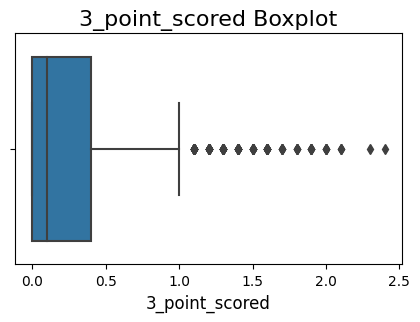

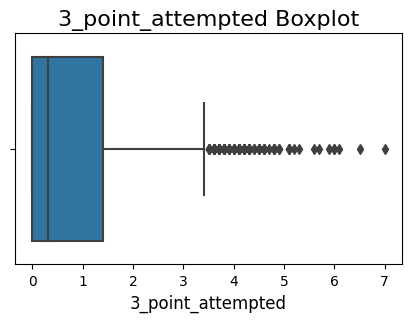

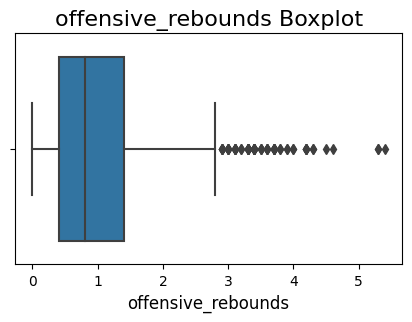

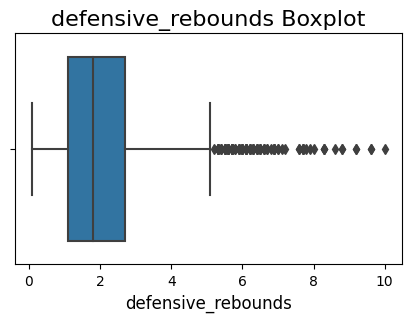

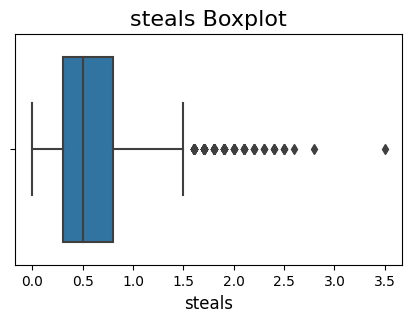

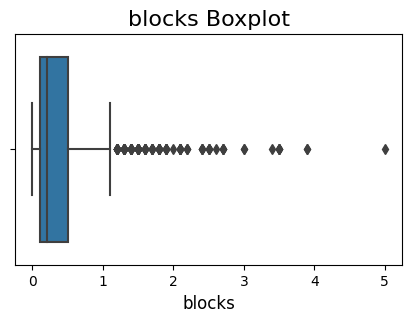

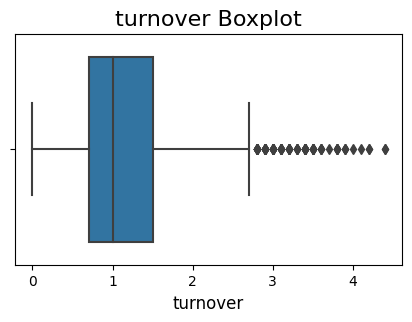

In [53]:
#Ploting boxplots for outlier analysis on the missing columns
missing_cols = [v for i, v in enumerate(df.isna().sum().index) if df.isna().sum().iloc[i] > 450]
for col in missing_cols:
  plot_box(col, col+' Boxplot', df[col], hue = df['5yrs'])

## Turkeys Method

In [90]:
# For further outlier analysis implementing turkeys method.
outliers = {k:None for k in missing_cols}
for c in missing_cols:
  out = turkeys_method(c)
  outliers[c] = out.to_list()

out_df = pd.DataFrame.from_dict(outliers, orient='index').transpose()
out_df.count()

3_point_scored        136
3_point_attempted      92
offensive_rebounds     68
defensive_rebounds    102
steals                 96
blocks                137
turnover              100
dtype: int64

## Imputing Data using Multiple Imputation

In [98]:
imputer = IterativeImputer()
imputed_data = imputer.fit_transform(df[missing_cols])
imputed_df = pd.DataFrame(imputed_data, columns=missing_cols)
df_imputed = pd.concat([df.drop(missing_cols, axis=1), imputed_df], axis=1) 

print(df_imputed.shape)
print(df_imputed.info())

(2672, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2672 entries, 0 to 2671
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   name                   2671 non-null   object 
 1   games_played           2671 non-null   float64
 2   minutes_played         2671 non-null   float64
 3   points_scored          2671 non-null   float64
 4   goals_scored           2671 non-null   float64
 5   goals_attempted        2671 non-null   float64
 6   free_throws_scored     2671 non-null   float64
 7   free_throws_attempted  2671 non-null   float64
 8   assists                2671 non-null   float64
 9   5yrs                   2671 non-null   float64
 10  3_point_scored         2672 non-null   float64
 11  3_point_attempted      2672 non-null   float64
 12  offensive_rebounds     2672 non-null   float64
 13  defensive_rebounds     2672 non-null   float64
 14  steals                 2672 non-null   float6

/usr/local/lib/python3.9/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


## Saving the preprocessed data as a CSV

In [107]:
df_imputed.to_csv('nba_imputed.csv')

## Loading & checking out the imputed dataset.

In [116]:
df = pd.read_csv('nba_imputed.csv')
display(df.head())

,name,games_played,minutes_played,points_scored,goals_scored,goals_attempted,free_throws_scored,free_throws_attempted,assists,3_point_scored,3_point_attempted,offensive_rebounds,defensive_rebounds,steals,blocks,turnover,5yrs
0,Brandon Ingram,36.0,27.4,7.4,2.6,7.6,1.6,2.3,1.9,0.5,2.1,0.7,3.4,0.4,0.4,1.3,0.0
1,Andrew Harrison,35.0,26.9,7.2,2.0,6.7,2.6,3.4,3.7,0.7,2.8,0.5,2.0,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74.0,15.3,5.2,2.0,4.7,0.9,1.3,1.0,0.4,1.7,0.5,1.7,0.5,0.3,1.0,0.0
3,Malik Sealy,58.0,11.6,5.7,2.3,5.5,0.9,1.3,0.8,0.1,0.5,1.0,0.9,0.6,0.1,1.0,1.0
4,Matt Geiger,48.0,11.5,4.5,1.6,3.0,1.3,1.9,0.3,0.0,0.1,1.0,1.5,0.3,0.4,0.8,1.0


In [117]:
display(df.info())
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2672 entries, 0 to 2671
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   name                   2671 non-null   object 
 1   games_played           2671 non-null   float64
 2   minutes_played         2671 non-null   float64
 3   points_scored          2671 non-null   float64
 4   goals_scored           2671 non-null   float64
 5   goals_attempted        2671 non-null   float64
 6   free_throws_scored     2671 non-null   float64
 7   free_throws_attempted  2671 non-null   float64
 8   assists                2671 non-null   float64
 9   3_point_scored         2671 non-null   float64
 10  3_point_attempted      2671 non-null   float64
 11  offensive_rebounds     2671 non-null   float64
 12  defensive_rebounds     2671 non-null   float64
 13  steals                 2671 non-null   float64
 14  blocks                 2671 non-null   float64
 15  turn

None

,games_played,minutes_played,points_scored,goals_scored,goals_attempted,free_throws_scored,free_throws_attempted,assists,3_point_scored,3_point_attempted,offensive_rebounds,defensive_rebounds,steals,blocks,turnover,5yrs
count,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000
mean,61.390865,17.927892,7.024448,2.723512,6.199326,1.370236,1.932273,1.534070,0.283866,0.883650,1.030533,2.137715,0.625023,0.391554,1.203777,0.600899
std,16.716561,8.422515,4.601011,1.785711,3.815504,1.082123,1.468452,1.388457,0.356359,0.991312,0.725490,1.333164,0.385823,0.430796,0.668673,0.489805
min,11.000000,3.100000,0.700000,0.300000,0.700000,0.000000,0.000000,0.000000,0.000000,-0.014498,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,11.200000,3.800000,1.500000,3.500000,0.700000,0.900000,0.600000,0.000000,0.100000,0.500000,1.200000,0.400000,0.100000,0.704275,0.000000
50%,64.000000,16.400000,5.700000,2.200000,5.100000,1.100000,1.500000,1.100000,0.249233,0.800000,1.000000,2.100000,0.600000,0.300000,1.200000,1.000000
75%,77.000000,23.350000,9.000000,3.500000,7.900000,1.800000,2.500000,2.000000,0.300359,1.053628,1.300000,2.500000,0.700000,0.400000,1.400000,1.000000
max,83.000000,46.400000,37.600000,14.800000,32.100000,9.200000,13.800000,10.600000,2.400000,7.000000,5.400000,10.000000,3.500000,5.000000,4.520170,1.000000


1. A negative value is identified in 3_point_attempted. Should be removed.

In [118]:
# removing negative value in 3_point_attempted
df = df[df['3_point_attempted'] >= 0]
df.shape

(2670, 17)

## Checking for data imbalance

In [123]:
df['5yrs'].value_counts()

1.0    1604
0.0    1066
Name: 5yrs, dtype: int64

## Converting to csv the final dataset.

In [124]:
df.to_csv('nba_final_model.csv')